### Test - Synthetic Turbulent Fields - 1/2/3D Gaussian Fields

</b> Author:   </b>  Louis Evans     </br>
</b> Reviewer: </b>  Stefano Merlini

### Import relevant files:

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import sys
#insert relevant path here
sys.path.insert(0, '../../src/')     # import path/to/synthpy

#import noise generators
import field_generator.gaussian1D as g1
import field_generator.gaussian2D as g2
import field_generator.gaussian3D as g3

#import some tools to check the generation
import utils.power_spectrum as spectrum

from lmfit.models import ExpressionModel

### 1D Gaussian field generation:

In [5]:
# Define turbulent parameters, l_min, l_max, power spectrum log gradient, extent (spatial), resolution (total noise length will be 2*res)
l_min = 0.01
l_max = 1
extent = 5
res = 500

def k_func(k):
    return k**(-1)

#create field object
field = g1.gaussian1D(k_func)

#generate noise, which varies randomly between -1 and 1
x, noise1D = field.fft(l_max, l_min, extent, res)

#turn this into perturbation around some mean value
mean_val = 1e25 #mean value
max_pert = 9e24 #scaling factor

ne = 1e25 + noise1D * max_pert

##### Perform some analysis to check it worked:

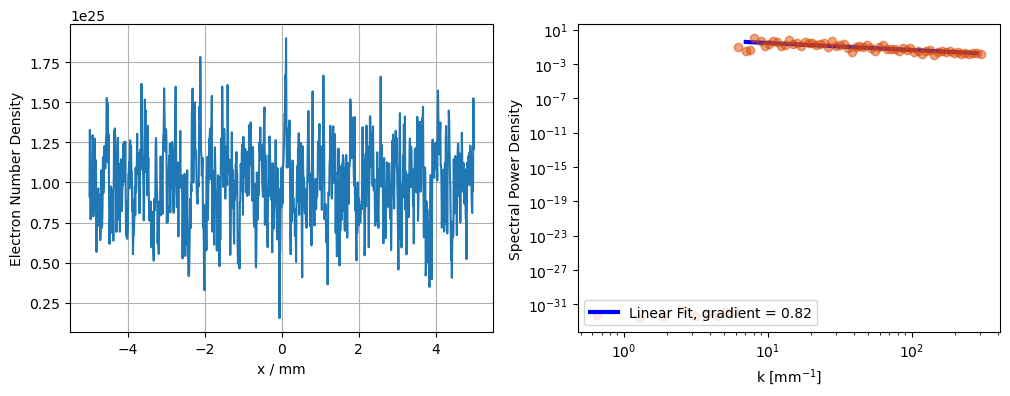

In [6]:
#Stefano's cool colours

c1 = '#1C6758'   # dark green
c2 = '#006e23'   # ciano
c3 = '#6e0052'   # violet
c4 = '#db4900'   # purple
c5 = '#37e67d'   # light green

fig, axs = plt.subplots(1,2, figsize = (12,4))
ax1, ax2 = axs
ax1.plot(x, ne)
ax1.set_xlabel('x / mm')
ax1.set_ylabel('Electron Number Density')
ax1.grid('off')

# plot the power spectrum and fit a straight line in log space to check the gradient
_, wn, ps_raw = spectrum.radial_1Dspectrum(ne, 2*extent) #take fft spectrum and filter out any none types
ps = ps_raw[~np.isnan(ps_raw)]/np.nanmax(ps_raw)
wn = wn[~np.isnan(ps_raw)]
ps = ps/np.max(ps)

ax2.plot(wn, ps, 'o', color = c4, zorder = 4, alpha = 0.5)
ax2.set_xscale('log')
ax2.set_yscale('log')

k_min, k_max = 2*np.pi/l_max, 2*np.pi/l_min

#fit straight line in the l_min and l_max limits
min_i = np.where(wn >= k_min)[0][0]
max_i = np.where(wn <= k_max)[0][-1]

mod = ExpressionModel('c*x + a')
mod.make_params()
mod.set_param_hint('a', value = 1)
mod.set_param_hint('c', value = -5/3)
res0 = mod.fit(np.array(np.log(ps[min_i : max_i])), x = np.log(wn[min_i : max_i]), nan_policy='omit')

ax2.plot(wn[min_i: max_i], np.exp(res0.best_fit), label = f"Linear Fit, gradient = {np.round(-res0.params['c'].value, 2)}", linewidth = 3, color = 'blue')

ax2.set_xlabel(r'k [mm$^{-1}$]')
ax2.set_ylabel('Spectral Power Density')
ax2.legend(loc = 'lower left')

plt.show()

### 2D Gaussian field generation:

In [7]:
# Define turbulent parameters, l_min, l_max, power spectrum log gradient, extent (spatial), resolution (total noise dimension will be 2*res x 2*res)
l_min = 0.01
l_max = 1
extent = 5
res = 100

def k_func(k):
    return k**(-1)

#create field object
field = g2.gaussian2D(k_func)

#generate noise, which varies randomly between -1 and 1
x, y, noise2D = field.fft(l_max, l_min, extent, res)

#turn this into perturbation around some mean value
mean_val = 1e25 #mean value
max_pert = 9e24 #scaling factor

ne = 1e25 + noise2D*max_pert

##### Perform some analysis to check it worked:

/home/administrator/.local/lib/python3.13/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/administrator/.local/lib/python3.13/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


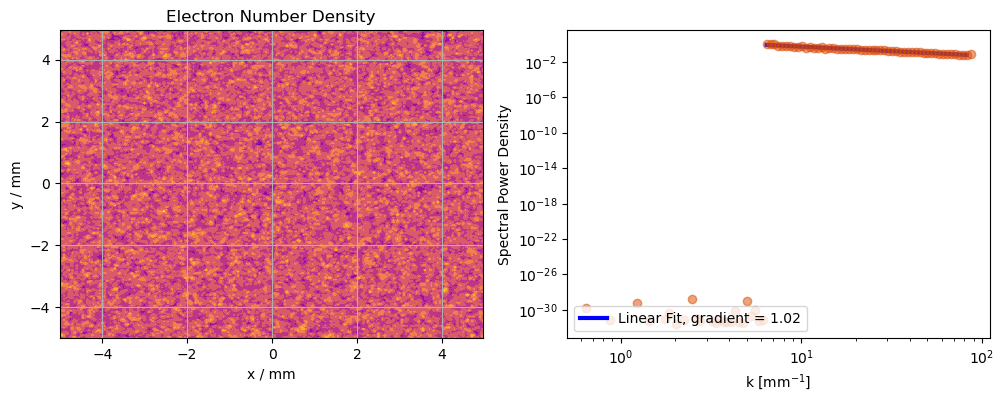

In [8]:
#Stefano's cool colours

c1 = '#1C6758'   # dark green
c2 = '#006e23'   # ciano
c3 = '#6e0052'   # violet
c4 = '#db4900'   # purple
c5 = '#37e67d'   #light green

fig, axs = plt.subplots(1,2, figsize = (12,4))
ax1, ax2 = axs
ax1.contourf(x,y, ne, cmap = 'plasma')
ax1.set_xlabel('x / mm')
ax1.set_ylabel('y / mm')
ax1.set_title('Electron Number Density')
ax1.grid('off')

# plot the power spectrum and fit a straight line in log space to check the gradient
_, wn, ps_raw = spectrum.radial_2Dspectrum(ne, 2*extent, 2*extent) #take fft spectrum and filter out any none types
ps = ps_raw[~np.isnan(ps_raw)]/np.nanmax(ps_raw)
wn = wn[~np.isnan(ps_raw)]
ps = ps/np.max(ps)

ax2.plot(wn, ps, 'o', color = c4, zorder = 4, alpha = 0.5)
ax2.set_xscale('log')
ax2.set_yscale('log')

k_min, k_max = 2*np.pi/l_max, 2*np.pi/l_min

#fit straight line in the l_min and l_max limits
min_i = np.where(wn >= k_min)[0][0]
max_i = np.where(wn <= k_max)[0][-1]

mod = ExpressionModel('c*x + a')
mod.make_params()
mod.set_param_hint('a', value = 1)
mod.set_param_hint('c', value = -5/3)
res0     =   mod.fit(np.array(np.log(ps[min_i : max_i])), x = np.log(wn[min_i : max_i]), nan_policy='omit')

ax2.plot(wn[min_i: max_i], np.exp(res0.best_fit), label = f"Linear Fit, gradient = {np.round(-res0.params['c'].value, 2)}", linewidth = 3, color = 'blue')

ax2.set_xlabel(r'k [mm$^{-1}$]')
ax2.set_ylabel('Spectral Power Density')
ax2.legend(loc = 'lower left')
plt.show()

### 3D Gaussian field generation:

In [9]:
# Define turbulent parameters, l_min, l_max, power spectrum log gradient, extent (spatial), resolution (total noise dimension will be 2*res x 2*res)
l_min = 0.01
l_max = 1
extent = 5
res = 312

def k_func(k):
    return k**(-10)

#create field object
field = g3.gaussian3D(k_func)

#generate noise, which varies randomly between -1 and 1
noise3D = field.fft(l_max, l_min, extent, res, factor = 1.0) #factor argument can scale integration length by 2 * extent * factor

#turn this into perturbation around some mean value
mean_val = 1e25 #mean value
max_pert = 9e24 #scaling factor

ne = 1e25 + noise3D*max_pert

: 

#### Perform some analysis to check it worked:

/rds/general/user/sm13118/home/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/rds/general/user/sm13118/home/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


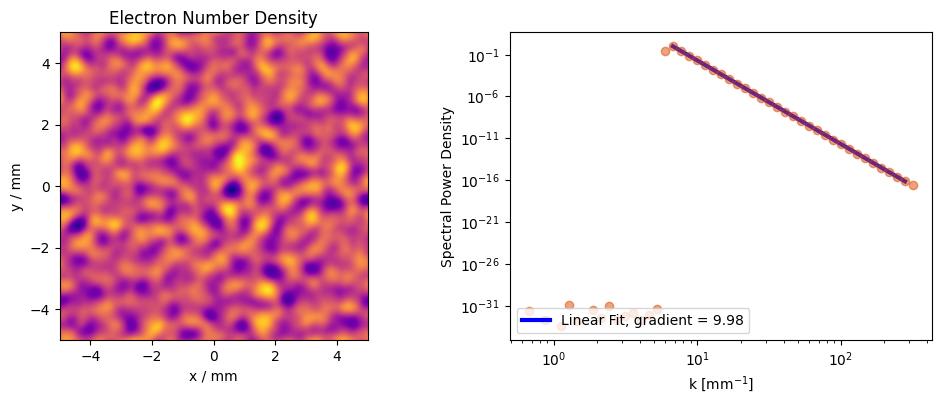

In [ ]:
#Stefano's cool colours
c1 = '#1C6758'   # dark green
c2 = '#006e23'   # ciano
c3 = '#6e0052'   # violet
c4 = '#db4900'   # purple
c5 = '#37e67d'   #light green

fig, axs = plt.subplots(1,2, figsize = (12,4))
ax1, ax2 = axs
ax1.imshow(ne[:,10,:], cmap = 'plasma', extent = (-extent, extent, -extent, extent)) #image a slice
ax1.set_xlabel('x / mm')
ax1.set_ylabel('y / mm')
ax1.set_title('Electron Number Density')
ax1.grid(False)

# plot the power spectrum and fit a straight line in log space to check the gradient
_, wn, ps_raw = spectrum.radial_3Dspectrum(ne, 2*extent, 2*extent, 2*extent) #take fft spectrum and filter out any none types
ps = ps_raw[~np.isnan(ps_raw)]/np.nanmax(ps_raw)
wn = wn[~np.isnan(ps_raw)]
ps = ps/np.max(ps)

ax2.plot(wn, ps, 'o', color = c4, zorder = 4, alpha = 0.5)
ax2.set_xscale('log')
ax2.set_yscale('log')

k_min, k_max = 2*np.pi/l_max, 2*np.pi/l_min

#fit straight line in the l_min and l_max limits
min_i = np.where(wn >= k_min)[0][0]
max_i = np.where(wn <= k_max)[0][-1]

mod = ExpressionModel('c*x + a')
mod.make_params()
mod.set_param_hint('a', value = 1)
mod.set_param_hint('c', value = -5/3)
res0     =   mod.fit(np.array(np.log(ps[min_i : max_i])), x = np.log(wn[min_i : max_i]), nan_policy='omit')

ax2.plot(wn[min_i: max_i], np.exp(res0.best_fit), label = f"Linear Fit, gradient = {np.round(-res0.params['c'].value, 2)}", linewidth = 3, color = 'blue')

ax2.set_xlabel(r'k [mm$^{-1}$]')
ax2.set_ylabel('Spectral Power Density')
ax2.legend(loc = 'lower left')
plt.show()

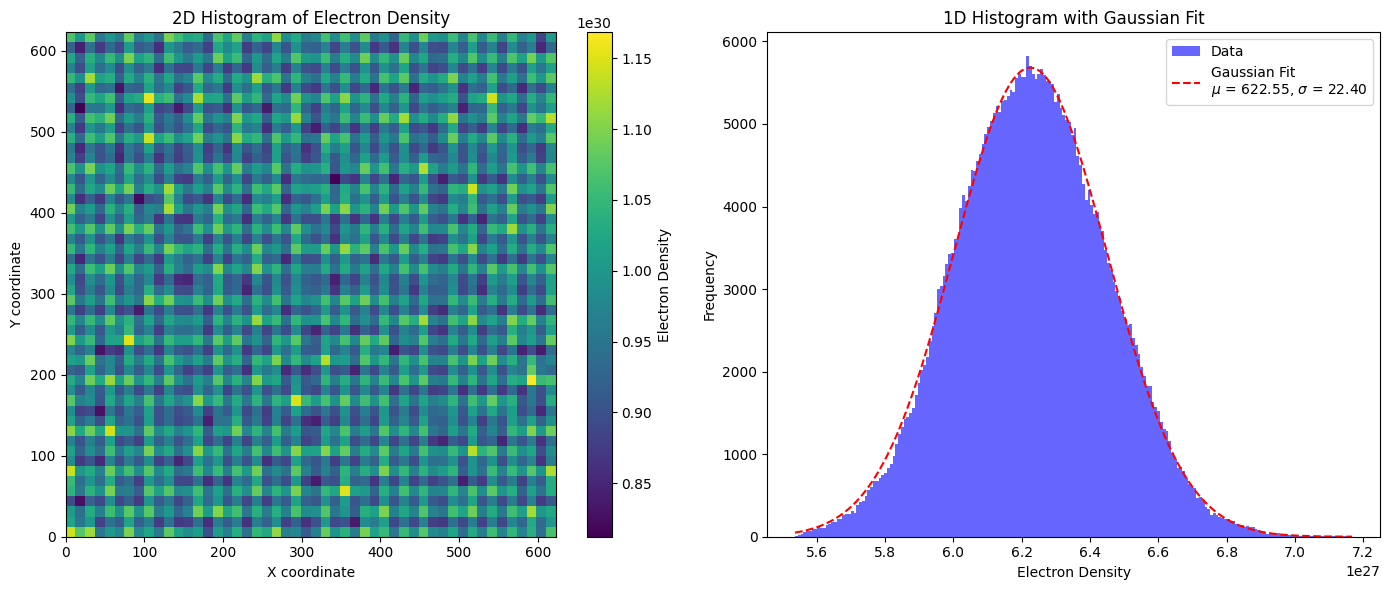

In [ ]:
from scipy.optimize import curve_fit

# Define a 1D Gaussian function to fit to the 1D histogram
def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Assuming 'electron_density' is a 3D NumPy array
# Let's take a slice of the 3D data at z=50
slice_2d = np.array(ne[:, :, 10])

slice_2d = np.trapz(ne, axis = 2)


# 1. Plotting the 2D Histogram
plt.figure(figsize=(14, 6))

x = np.arange(slice_2d.shape[1])
y = np.arange(slice_2d.shape[0])
X, Y = np.meshgrid(x, y)


plt.subplot(1, 2, 1)  # First subplot for 2D histogram
plt.hist2d(X.flatten(), Y.flatten(), bins=[50, 50], weights=slice_2d.flatten(), cmap='viridis')
plt.colorbar(label='Electron Density')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('2D Histogram of Electron Density')

# 2. Plotting the 1D Histogram
plt.subplot(1, 2, 2)  # Second subplot for 1D histogram

# Compute the 1D histogram of the electron density values
bin_heights, bin_borders = np.histogram(slice_2d.flatten(), bins=200)

# Plot the 1D histogram
plt.hist(bin_borders[:-1], bin_borders, weights=bin_heights, density=False, alpha=0.6, color='b', label='Data')

# Prepare data for curve fitting
bin_centers = (bin_borders[:-1] + bin_borders[1:]) / 2  # Compute bin centers
p0 = [np.max(bin_heights), np.mean(slice_2d), np.std(slice_2d)]  # Initial guesses for amplitude, mean, std

# Fit the Gaussian function to the histogram data
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=p0)

# Plot the fitted Gaussian curve
x_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000)
plt.plot(x_fit, gaussian(x_fit, *popt), 'r--', label=f'Gaussian Fit\n$\\mu$ = {popt[1]*1e-25:.2f}, $\\sigma$ = {popt[2]*1e-25:.2f}')

# Set labels, title, and legend
plt.xlabel('Electron Density')
plt.ylabel('Frequency')
plt.title('1D Histogram with Gaussian Fit')
plt.legend()

# Show both plots
plt.tight_layout()
plt.show()